<a href="https://colab.research.google.com/github/sandeshsbhalerao/python/blob/main/googlesheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

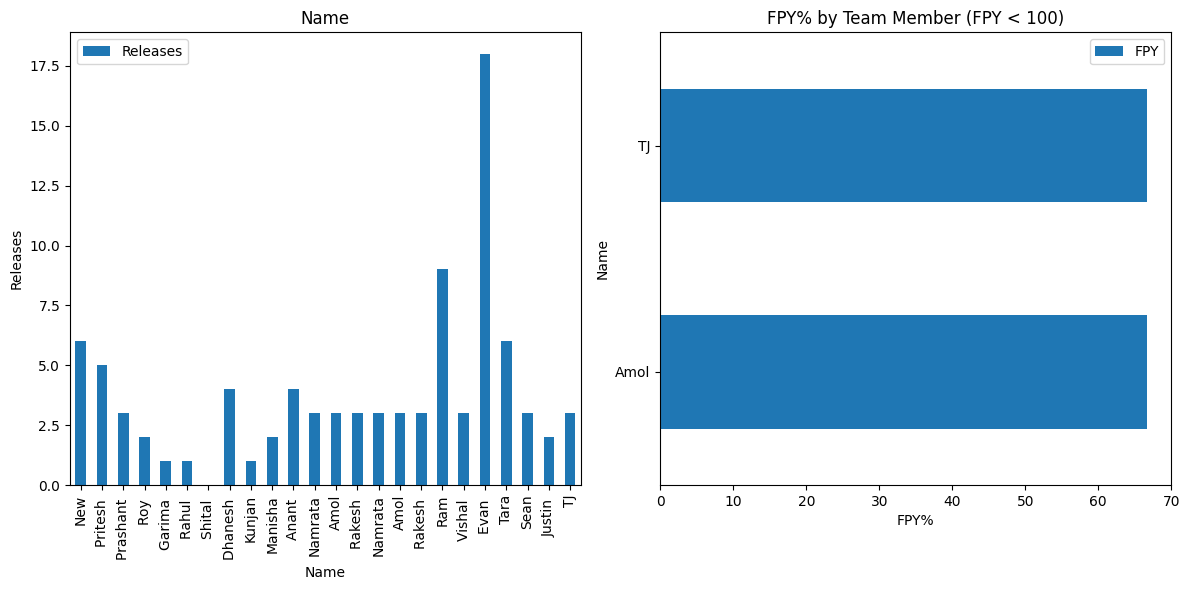

Index(['Sr', 'Name', 'Releases', 'Team ', 'Month', 'Rollbacks', 'FPY'], dtype='object')
   Sr       Name  Releases          Team     Month  Rollbacks    FPY
0   1        New         6  MImeo Photos   June-24          0  100.0
1   2   Pritesh          5  MImeo Photos   June-24          0  100.0
2   3  Prashant          3  MImeo Photos   June-24          0  100.0
3   4       Roy          2  MImeo Photos   June-24          0  100.0
4   5    Garima          1  MImeo Photos   June-24          0  100.0


In [27]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
import matplotlib.pyplot as plt

# --- BEGIN_SOLUTION ---
# Add the code to read the spreadsheet and create the DataFrame 'df' here
# Example:
#from google.colab import files
#uploaded = files.upload()
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
credentials = ServiceAccountCredentials.from_json_keyfile_name('keys.json', scope) # Updated file path
client = gspread.authorize(credentials)
sheet = client.open('FPY').sheet1
data = sheet.get_all_records()
df = pd.DataFrame(data)  # Create the DataFrame 'df' here
# --- END_SOLUTION ---

# Attempt to convert numeric columns
numeric_columns = ['Rollbacks', 'FPY']
for col in numeric_columns:
    try:
        # Check the data type of the column before applying string operations
        if df[col].dtype == object:  # Proceed only if the column is of object (string) type
            df[col] = df[col].str.replace(r'\D+', '', regex=True)

        df[col] = pd.to_numeric(df[col], errors='coerce')
    except KeyError:
        print(f"Column '{col}' not found in the DataFrame. Check the column names.")

# Check if there are any numeric columns left after conversion
if df.select_dtypes(include=['number']).empty:
    print("Error: No numeric columns found in the DataFrame after conversion.")
else:
    # --- Plotting against 'Team Member' ---
    fig, ax = plt.subplots(1, 2, figsize=(12, 6)) # Create two subplots

    # Plot 'No. Of releases'
    df.plot(x='Name', y='Releases', kind='bar', ax=ax[0])
    ax[0].set_title('Name')
    ax[0].set_ylabel('Releases')

    # --- Filter the DataFrame to include FPY values less than 100 ---
    df_filtered = df[df['FPY'] < 100]  # Create df_filtered here

    # Plot 'FPY% ( Good vs Bad releases)  '
    df_filtered.plot(x='Name', y='FPY', kind='barh', ax=ax[1]) # Plot on the second subplot
    ax[1].set_title('FPY% by Team Member (FPY < 100)')
    ax[1].set_xlabel('FPY%')
    plt.tight_layout()
    plt.show()

    print(df.columns) #Print columns to verify data
    print(df.head())